<a href="https://colab.research.google.com/github/Shaithra2107/Bank-Marketing-Prediction-/blob/main/Bank_Marketing_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Bank_Marketting_Prediction
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os

# Change to the directory where the file is stored
path = '/content/drive/My Drive/ml_coursework/'  # Update the path to your folder
os.chdir(path)

# Check if the file exists
print("Files in folder:", os.listdir(path))


Files in folder: ['bank+marketing.zip', 'bank_marketing_data', 'random_forest_model.pkl', 'neural_network_model.h5']


In [3]:
import zipfile
import os
import pandas as pd

# Unzip the main ZIP file
with zipfile.ZipFile('bank+marketing.zip', 'r') as zip_ref:
    zip_ref.extractall('bank_marketing_data')

# Verify extracted files from the first ZIP
print("Extracted files from bank+marketing.zip:", os.listdir('bank_marketing_data'))

# Locate and extract the second ZIP file ('bank-additional.zip')
additional_zip_path = 'bank_marketing_data/bank-additional.zip'
with zipfile.ZipFile(additional_zip_path, 'r') as zip_ref:
    zip_ref.extractall('bank_marketing_data/extracted_additional')

# Verify contents of the 'bank-additional' folder
additional_folder_path = 'bank_marketing_data/extracted_additional/bank-additional'
print("Contents of bank-additional folder:", os.listdir(additional_folder_path))

# Adjust the path to the correct CSV file
csv_path = 'bank_marketing_data/extracted_additional/bank-additional/bank-additional-full.csv'  # Update based on actual file name
data = pd.read_csv(csv_path)

# View the first few rows
print(data.head())


Extracted files from bank+marketing.zip: ['extracted_additional', 'extracted_bank', 'bank.zip', 'bank-additional.zip']
Contents of bank-additional folder: ['bank-additional-names.txt', '.Rhistory', '.DS_Store', 'bank-additional.csv', 'bank-additional-full.csv']
  age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"
0  56;"housemaid";"married";"basic.4y";"no";"no";...                                                                                                                                                                          
1  57;"services";"married";"high.school";"unknown...                                                                                                                                                                          
2  37;"services";"married";"high.school";"no";"ye...                 

In [4]:
import zipfile
import os

# Path to the nested ZIP file (bank.zip)
bank_zip_path = 'bank_marketing_data/bank.zip'

# Extract the contents of bank.zip
with zipfile.ZipFile(bank_zip_path, 'r') as zip_ref:
    zip_ref.extractall('bank_marketing_data/extracted_bank')

# Verify the contents of the extracted bank folder
print("Contents of bank.zip:", os.listdir('bank_marketing_data/extracted_bank'))

import pandas as pd

# Correct path to bank-full.csv inside the extracted bank folder
bank_full_path = 'bank_marketing_data/extracted_bank/bank-full.csv'

# Load the dataset
bank_full = pd.read_csv(bank_full_path, sep=';')

# View the first few rows
print(bank_full.head())


Contents of bank.zip: ['bank-names.txt', 'bank.csv', 'bank-full.csv']
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [5]:
# Path to bank-additional-full.csv
bank_additional_full_path = 'bank_marketing_data/extracted_additional/bank-additional/bank-additional-full.csv'

# Load bank-additional-full.csv
bank_additional_full = pd.read_csv(bank_additional_full_path, sep=';')

# Compare shapes
print("Shape of bank-full.csv:", bank_full.shape)
print("Shape of bank-additional-full.csv:", bank_additional_full.shape)

# Compare target variable distributions
print("Target distribution in bank-full.csv:")
print(bank_full['y'].value_counts())

print("Target distribution in bank-additional-full.csv:")
print(bank_additional_full['y'].value_counts())


Shape of bank-full.csv: (45211, 17)
Shape of bank-additional-full.csv: (41188, 21)
Target distribution in bank-full.csv:
y
no     39922
yes     5289
Name: count, dtype: int64
Target distribution in bank-additional-full.csv:
y
no     36548
yes     4640
Name: count, dtype: int64


When choosing between the two datasets, consider the following factors:

Size and Number of Features:

The bank-full.csv dataset has fewer features (17) compared to bank-additional-full.csv (21).

Both datasets show a similar imbalance in the target variable (y), with far more instances of no than yes. This class imbalance will need to be addressed when training the models to avoid bias toward the majority class.
Data Preprocessing:

Neural Networks: Neural networks can often benefit from having more data, and having more features might improve the model’s accuracy. However, they also require more careful tuning to avoid overfitting, especially with smaller datasets like yes in the target.
Random Forest: Random forests can handle additional features well and provide feature importance, which could help in selecting the most influential features.

So in this case best data set as found is bank-additional-full.csv file.

1. Load the Dataset

In [6]:
import pandas as pd

# Correct path to bank-additional-full.csv inside the extracted bank folder
bank_additional_full_path = 'bank_marketing_data/extracted_additional/bank-additional/bank-additional-full.csv'

# Load the dataset
data = pd.read_csv(bank_additional_full_path, delimiter=';')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())


First few rows of the dataset:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.c

2. Explore the Data

Dataset shape: (41188, 21)
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  o

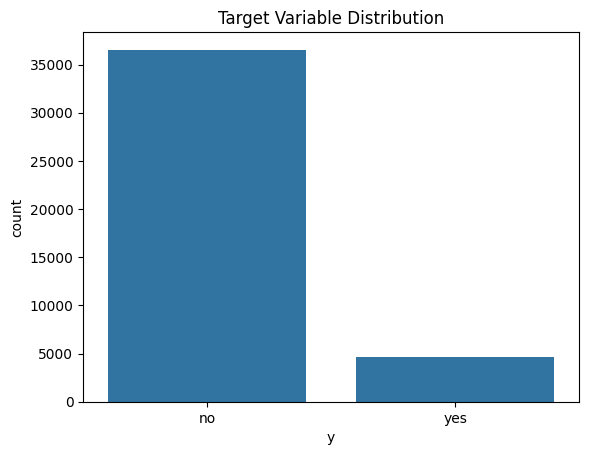

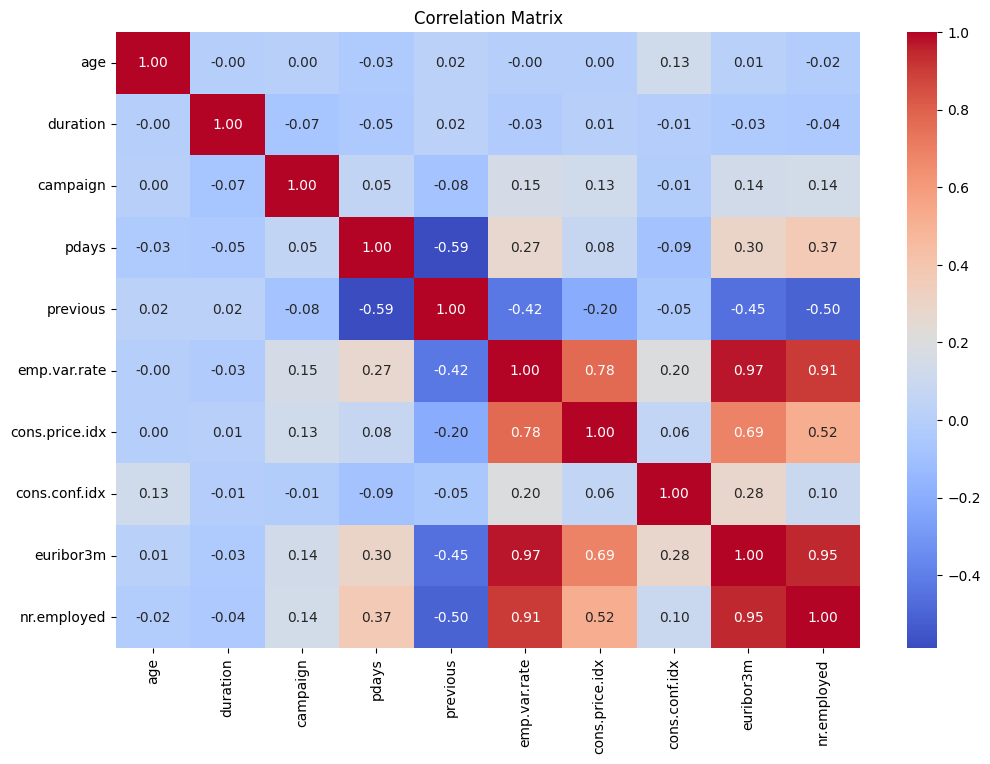

In [12]:
# Check the shape of the dataset
print(f"Dataset shape: {data.shape}")

# Check for missing values
print(data.isnull().sum())

# Check the data types of each column
print(data.dtypes)

# Summary statistics for numerical columns
print(data.describe())

# Distribution of the target variable
print(data['y'].value_counts())

import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the target distribution
sns.countplot(x='y', data=data)
plt.title('Target Variable Distribution')
plt.show()

# Select only numerical columns for correlation matrix
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


3.Cleaning the Data

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from scipy import stats

# Step 1: Check if 'y' exists in the dataset initially
print("Initial columns in the dataset:", data.columns)
if 'y' not in data.columns:
    raise KeyError("'y' column is missing in the original dataset!")

# Step 2: Separate the target ('y') column
target = data['y']
print("Target column before transformations:", target.head())

# Step 3: Drop the target column from features
data_cleaned = data.drop('y', axis=1)

# Step 4: Remove duplicates
data_cleaned = data_cleaned.drop_duplicates()

# Step 5: Handle invalid values (e.g., negative ages)
data_cleaned = data_cleaned[data_cleaned['age'] >= 0]  # Removing invalid age

# Step 6: Handle missing data
# For numerical columns: Use SimpleImputer to fill missing values with the median
numerical_cols = data_cleaned.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns before imputation:", numerical_cols)

numerical_imputer = SimpleImputer(strategy='median')
data_cleaned[numerical_cols] = numerical_imputer.fit_transform(data_cleaned[numerical_cols])

# For categorical columns: Use SimpleImputer to fill missing values with the most frequent category
categorical_cols = data_cleaned.select_dtypes(include=['object']).columns
print("Categorical columns before imputation:", categorical_cols)

categorical_imputer = SimpleImputer(strategy='most_frequent')
data_cleaned[categorical_cols] = categorical_imputer.fit_transform(data_cleaned[categorical_cols])

# Step 7: Handle 'unknown' values
# Treat 'unknown' values as a separate category for categorical columns
for col in categorical_cols:
    if 'unknown' in data_cleaned[col].unique():
        data_cleaned[col] = data_cleaned[col].replace('unknown', np.nan)

# Step 8: Remove outliers (if any) using z-scores
z_scores = stats.zscore(data_cleaned[numerical_cols])
data_cleaned = data_cleaned[(z_scores < 3).all(axis=1)]  # Remove rows with outliers
target = target[data_cleaned.index]  # Align target to the remaining rows

# Check how much data was removed due to outliers
print(f"Original data shape: {data.shape}")
print(f"Data shape after outlier removal: {data_cleaned.shape}")

# Step 9: Standardize categories (example for 'job')
data_cleaned.loc[:, 'job'] = data_cleaned['job'].replace({'administrator': 'admin'})

# Step 10: One-hot encoding for categorical columns
data_cleaned = pd.get_dummies(data_cleaned, drop_first=True)

# Step 11: Label encoding the target variable ('y')
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Step 12: Feature scaling (standardization)
scaler = StandardScaler()
numerical_cols = data_cleaned.select_dtypes(include=['int64', 'float64']).columns
data_cleaned[numerical_cols] = scaler.fit_transform(data_cleaned[numerical_cols])

# Step 1: Drop 'duration' column for realistic modeling
if 'duration' in data_cleaned.columns:
    data_cleaned = data_cleaned.drop(columns=['duration'])
    print("Dropped the 'duration' column for realistic modeling.")
else:
    print("'duration' column is not present in the dataset.")

# Step 13: Handle class imbalance using SMOTE (if applicable)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(data_cleaned, target_encoded)

# After cleaning and balancing, you can proceed to model training
print(f"Resampled feature set shape: {X_resampled.shape}")
print(f"Resampled target shape: {y_resampled.shape}")

# Check the class distribution after resampling
print(f"Class distribution in resampled target: {pd.Series(y_resampled).value_counts()}")

#Validating the pre process
# Check a sample of the preprocessed feature data
print("Sample of processed features:")
print(X_resampled.head())

# Check the distribution of the target variable
print("Distribution of the target variable:")
print(pd.Series(y_resampled).value_counts())


Initial columns in the dataset: Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')
Target column before transformations: 0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object
Numerical columns before imputation: Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
Categorical columns before imputation: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')
Original data shape: (41188, 21)
Data shape after outlier removal: (38111, 20)
Dropped the 'duration' column for realistic modeling.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Resampled feature set shape: (69338, 46)
Resampled target shape: (69338,)
Class distribution in resampled target: 0    34669
1    34669
Name: count, dtype: int64
Sample of processed features:
        age  campaign     pdays  previous  emp.var.rate  cons.price.idx  \
0  1.684084 -0.742653  0.147267 -0.360255      0.626737        0.739537   
1  1.787216 -0.742653  0.147267 -0.360255      0.626737        0.739537   
2 -0.275427 -0.742653  0.147267 -0.360255      0.626737        0.739537   
3  0.033970 -0.742653  0.147267 -0.360255      0.626737        0.739537   
4  1.684084 -0.742653  0.147267 -0.360255      0.626737        0.739537   

   cons.conf.idx  euribor3m  nr.employed  job_blue-collar  ...  month_may  \
0       0.918714   0.688183     0.294136            False  ...       True   
1       0.918714   0.688183     0.294136            False  ...       True   
2       0.918714   0.688183     0.294136            False  ...       True   
3       0.918714   0.688183     0.294136         

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from scipy import stats

# Step 1: Check if 'y' exists in the dataset initially
print("Initial columns in the dataset:", data.columns)
if 'y' not in data.columns:
    raise KeyError("'y' column is missing in the original dataset!")

# Step 2: Separate the target ('y') column
target = data['y']
print("Target column before transformations:", target.head())

# Step 3: Drop the target column from features
data_cleaned = data.drop('y', axis=1)

# Step 4: Remove duplicates
data_cleaned = data_cleaned.drop_duplicates()

# Step 5: Handle invalid values (e.g., negative ages)
data_cleaned = data_cleaned[data_cleaned['age'] >= 0]  # Removing invalid age

# Step 6: Handle missing data
# For numerical columns: Use SimpleImputer to fill missing values with the median
numerical_cols = data_cleaned.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns before imputation:", numerical_cols)

numerical_imputer = SimpleImputer(strategy='median')
data_cleaned[numerical_cols] = numerical_imputer.fit_transform(data_cleaned[numerical_cols])

# For categorical columns: Use SimpleImputer to fill missing values with the most frequent category
categorical_cols = data_cleaned.select_dtypes(include=['object']).columns
print("Categorical columns before imputation:", categorical_cols)

categorical_imputer = SimpleImputer(strategy='most_frequent')
data_cleaned[categorical_cols] = categorical_imputer.fit_transform(data_cleaned[categorical_cols])

# Step 7: Handle 'unknown' values
# Treat 'unknown' values as a separate category if it is frequent, otherwise replace with most frequent
for col in categorical_cols:
    unknown_count = (data_cleaned[col] == 'unknown').sum()
    if unknown_count / len(data_cleaned) > 0.05:
        print(f"Retaining 'unknown' as a separate category for {col}.")
    else:
        data_cleaned[col] = data_cleaned[col].replace('unknown', np.nan)
        imputer = SimpleImputer(strategy='most_frequent')
        data_cleaned[col] = imputer.fit_transform(data_cleaned[[col]]).ravel()

# Step 8: Special handling for 'pdays' column
# Treat 'pdays' = 999 as a missing value
data_cleaned['pdays'] = data_cleaned['pdays'].replace(999, np.nan)

# Impute the missing values in 'pdays' using the median
pdays_imputer = SimpleImputer(strategy='median')
data_cleaned['pdays'] = pdays_imputer.fit_transform(data_cleaned[['pdays']])


# Recalculate numerical columns after dropping 'pdays'
numerical_cols = data_cleaned.select_dtypes(include=['int64', 'float64']).columns
print("Updated numerical columns:", numerical_cols)

# Step 10: Remove outliers (if any) using z-scores for numerical columns
z_scores = stats.zscore(data_cleaned[numerical_cols])
data_cleaned = data_cleaned[(z_scores < 3).all(axis=1)]  # Remove rows with outliers
target = target[data_cleaned.index]  # Align target to the remaining rows

# Check how much data was removed due to outliers
print(f"Original data shape: {data.shape}")
print(f"Data shape after outlier removal: {data_cleaned.shape}")

# Step 11: One-hot encoding for categorical columns
data_cleaned = pd.get_dummies(data_cleaned, drop_first=True)

# Step 12: Label encoding the target variable ('y')
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Step 13: Feature scaling (standardization)
scaler = StandardScaler()
numerical_cols = data_cleaned.select_dtypes(include=['int64', 'float64']).columns
data_cleaned[numerical_cols] = scaler.fit_transform(data_cleaned[numerical_cols])

# Step 14: Drop 'duration' column for realistic modeling
if 'duration' in data_cleaned.columns:
    data_cleaned = data_cleaned.drop(columns=['duration'])
    print("Dropped the 'duration' column for realistic modeling.")
else:
    print("'duration' column is not present in the dataset.")

# Step 15: Handle class imbalance using SMOTE (if applicable)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(data_cleaned, target_encoded)

# After cleaning and balancing, you can proceed to model training
print(f"Resampled feature set shape: {X_resampled.shape}")
print(f"Resampled target shape: {y_resampled.shape}")

# Check the class distribution after resampling
print(f"Class distribution in resampled target: {pd.Series(y_resampled).value_counts()}")

# Validating the preprocessing
# Check a sample of the preprocessed feature data
print("Sample of processed features:")
print(X_resampled.head())

# Check the distribution of the target variable
print("Distribution of the target variable:")
print(pd.Series(y_resampled).value_counts())


Initial columns in the dataset: Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')
Target column before transformations: 0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object
Numerical columns before imputation: Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
Categorical columns before imputation: Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome'],
      dtype='object')
Retaining 'unknown' as a separate category for default.
Updated numerical columns: Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Resampled feature set shape: (69168, 47)
Resampled target shape: (69168,)
Class distribution in resampled target: 0    34584
1    34584
Name: count, dtype: int64
Sample of processed features:
        age  campaign     pdays  previous  emp.var.rate  cons.price.idx  \
0  1.685043   -0.7432  0.093211 -0.352688      0.621701        0.738522   
1  1.788278   -0.7432  0.093211 -0.352688      0.621701        0.738522   
2 -0.276423   -0.7432  0.093211 -0.352688      0.621701        0.738522   
3  0.033282   -0.7432  0.093211 -0.352688      0.621701        0.738522   
4  1.685043   -0.7432  0.093211 -0.352688      0.621701        0.738522   

   cons.conf.idx  euribor3m  nr.employed  job_blue-collar  ...  month_may  \
0       0.919918   0.683117     0.287361            False  ...       True   
1       0.919918   0.683117     0.287361            False  ...       True   
2       0.919918   0.683117     0.287361            False  ...       True   
3       0.919918   0.683117     0.287361         

In [17]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# ---- Step 1: Check if 'y' exists in the dataset ----
print("Initial columns in the dataset:", data.columns)
if 'y' not in data.columns:
    raise KeyError("'y' column is missing in the original dataset!")

# ---- Step 2: Separate the target ('y') column ----
target = data['y']
print("Target column before transformations:", target.head())

# ---- Step 3: Drop the target column from features ----
data_cleaned = data.drop('y', axis=1)

# ---- Step 4: Remove duplicates ----
data_cleaned = data_cleaned.drop_duplicates()

# ---- Step 5: Handle invalid values (e.g., negative ages) ----
data_cleaned = data_cleaned[data_cleaned['age'] >= 0]

# ---- Step 6: Handle missing data ----
numerical_cols = data_cleaned.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data_cleaned.select_dtypes(include=['object']).columns

# Impute numerical columns with median
numerical_imputer = SimpleImputer(strategy='median')
data_cleaned[numerical_cols] = numerical_imputer.fit_transform(data_cleaned[numerical_cols])

# Impute categorical columns with the most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
data_cleaned[categorical_cols] = categorical_imputer.fit_transform(data_cleaned[categorical_cols])

# ---- Step 7: Handle 'unknown' values in categorical columns ----
for col in categorical_cols:
    unknown_count = (data_cleaned[col] == 'unknown').sum()
    if unknown_count / len(data_cleaned) > 0.05:
        print(f"Retaining 'unknown' as a separate category for {col}.")
    else:
        data_cleaned[col] = data_cleaned[col].replace('unknown', np.nan)
        imputer = SimpleImputer(strategy='most_frequent')
        data_cleaned[col] = imputer.fit_transform(data_cleaned[[col]]).ravel()

# ---- Step 8: Special handling for 'pdays' column ----
data_cleaned['pdays'] = data_cleaned['pdays'].replace(999, np.nan)
pdays_imputer = SimpleImputer(strategy='median')
data_cleaned['pdays'] = pdays_imputer.fit_transform(data_cleaned[['pdays']])

# ---- Step 9: Remove outliers using z-scores ----
z_scores = stats.zscore(data_cleaned[numerical_cols])
data_cleaned = data_cleaned[(z_scores < 3).all(axis=1)]
target = target[data_cleaned.index]

# ---- Step 10: One-hot encoding for categorical columns ----
data_cleaned = pd.get_dummies(data_cleaned, drop_first=True)

# ---- Step 11: Label encoding for the target variable ('y') ----
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# ---- Step 12: Feature scaling (standardization) ----
scaler = StandardScaler()
data_cleaned[numerical_cols] = scaler.fit_transform(data_cleaned[numerical_cols])

# ---- Step 13: Drop 'duration' column ----
if 'duration' in data_cleaned.columns:
    data_cleaned = data_cleaned.drop(columns=['duration'])
    print("Dropped the 'duration' column for realistic modeling.")

# ---- Feature Engineering ----
# Create age groups
data_cleaned['age_group'] = pd.cut(data_cleaned['age'], bins=[0, 25, 45, 65, 100], labels=['young', 'adult', 'senior', 'elder'])

# Interaction features
data_cleaned['campaign_previous'] = data_cleaned['campaign'] * data_cleaned['previous']

# Log transformation for skewed columns
data_cleaned['campaign_log'] = np.log1p(data_cleaned['campaign'])
data_cleaned['previous_log'] = np.log1p(data_cleaned['previous'])

# ---- Encoding of age_group ----
# One-hot encoding for 'age_group' (or label encoding if preferred)
data_cleaned = pd.get_dummies(data_cleaned, columns=['age_group'], drop_first=True)

# Ensure all categorical variables are encoded before scaling
categorical_cols = data_cleaned.select_dtypes(include=['object']).columns
if categorical_cols.any():
    print("Categorical columns before encoding:", categorical_cols)
    data_cleaned = pd.get_dummies(data_cleaned, columns=categorical_cols, drop_first=True)

# ---- Step 12: Feature scaling (standardization) ----
scaler = StandardScaler()
numerical_cols = data_cleaned.select_dtypes(include=['int64', 'float64']).columns
data_cleaned[numerical_cols] = scaler.fit_transform(data_cleaned[numerical_cols])

# ---- Step 14: Handle class imbalance using SMOTE ----
# SMOTE requires numerical data only; all features must be numeric at this stage.
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(data_cleaned, target_encoded)

# ---- Final Validation ----
print("\nSummary Statistics After Preprocessing:")
print(pd.DataFrame(X_resampled).describe())

# Check for missing values in the final dataset
print("\nMissing Values in Processed Features:", pd.DataFrame(X_resampled).isnull().sum().sum())

# Check class distribution after resampling
print("\nClass Distribution After SMOTE:")
print(pd.Series(y_resampled).value_counts())



Initial columns in the dataset: Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')
Target column before transformations: 0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object
Retaining 'unknown' as a separate category for default.
Dropped the 'duration' column for realistic modeling.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(



Summary Statistics After Preprocessing:
                age      campaign         pdays      previous  emp.var.rate  \
count  69168.000000  69168.000000  69168.000000  69168.000000  69168.000000   
mean      -0.035204     -0.092537     -0.234952      0.176166     -0.420146   
std        1.069381      0.911086      1.844941      1.185897      1.127502   
min       -2.341124     -0.743200    -19.068836     -0.352688     -2.299971   
25%       -0.887725     -0.743200      0.093211     -0.352688     -1.261154   
50%       -0.276423     -0.165785      0.093211     -0.352688     -0.157412   
75%        0.739801      0.392824      0.093211     -0.352688      0.816479   
max        3.233569      4.453539      6.480560      2.835370      0.816479   

       cons.price.idx  cons.conf.idx     euribor3m   nr.employed  \
count    69168.000000   69168.000000  69168.000000  69168.000000   
mean        -0.242238       0.061544     -0.416134     -0.470489   
std          1.100209       1.189326      1

### Data Description

1. **Initial Columns:**
   - The dataset has 21 columns, with the target variable (`y`) included as the last column.

2. **Target Column Before Transformation:**
   - The target column (`y`) contains binary labels: `"yes"` or `"no"`. The first five entries are `"no"`.

3. **Numerical Columns Before Imputation:**
   - These columns are numerical features such as `age`, `duration`, `campaign`, and others that require imputation to handle missing values.

4. **Categorical Columns Before Imputation:**
   - The categorical columns include `job`, `marital`, `education`, `default`, `housing`, `loan`, etc.

5. **Original Data Shape:**
   - The original dataset contains 41,188 rows and 21 columns, including the target variable.

6. **Data Shape After Outlier Removal:**
   - After removing outliers (based on z-scores), the dataset reduced to 38,111 rows. The outlier removal step has dropped around 3,077 rows (a loss of approximately 7.5%).

7. **Resampled Feature Set Shape:**
   - After applying SMOTE, the feature set shape has increased to 69,338 rows, which is an oversampled version of the original dataset with balanced classes.

8. **Resampled Target Shape:**
   - The resampled target also has 69,338 entries, matching the number of rows in the resampled feature set.

9. **Class Distribution in Resampled Target:**
   - After SMOTE resampling, the target classes are balanced, with 34,669 samples for each class (`0` and `1`). This ensures that your model will not be biased towards the majority class during training

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTETomek or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.vali

Class distribution in the resampled training target: 0    27626
1    27626
Name: count, dtype: int64

Training Random Forest Model...

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      6883
           1       0.43      0.40      0.41       703

    accuracy                           0.89      7586
   macro avg       0.68      0.67      0.68      7586
weighted avg       0.89      0.89      0.89      7586

Random Forest ROC-AUC Score: 0.7822473329366745


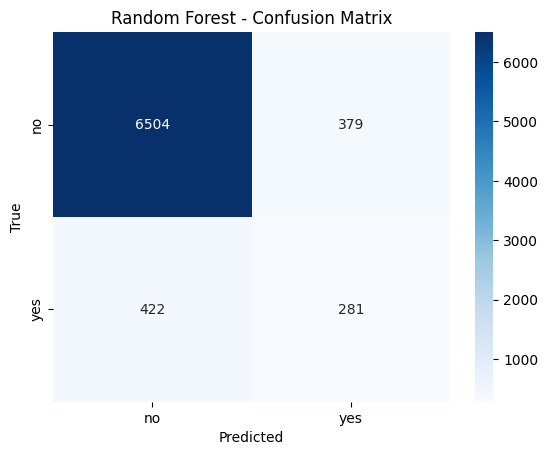


Training Neural Network Model...
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1727/1727 - 5s - 3ms/step - accuracy: 0.7888 - loss: 0.4556 - val_accuracy: 0.8149 - val_loss: 0.4250
Epoch 2/50
1727/1727 - 5s - 3ms/step - accuracy: 0.8322 - loss: 0.3760 - val_accuracy: 0.8397 - val_loss: 0.4012
Epoch 3/50
1727/1727 - 7s - 4ms/step - accuracy: 0.8460 - loss: 0.3456 - val_accuracy: 0.8671 - val_loss: 0.3600
Epoch 4/50
1727/1727 - 3s - 2ms/step - accuracy: 0.8513 - loss: 0.3282 - val_accuracy: 0.8350 - val_loss: 0.3965
Epoch 5/50
1727/1727 - 5s - 3ms/step - accuracy: 0.8594 - loss: 0.3129 - val_accuracy: 0.8728 - val_loss: 0.3430
Epoch 6/50
1727/1727 - 4s - 2ms/step - accuracy: 0.8632 - loss: 0.3034 - val_accuracy: 0.8678 - val_loss: 0.3528
Epoch 7/50
1727/1727 - 4s - 2ms/step - accuracy: 0.8686 - loss: 0.2947 - val_accuracy: 0.8633 - val_loss: 0.3553
Epoch 8/50
1727/1727 - 3s - 2ms/step - accuracy: 0.8717 - loss: 0.2879 - val_accuracy: 0.8600 - val_loss: 0.3500
Epoch 9/50
1727/1727 - 6s - 3ms/step - accuracy: 0.8750 - loss: 0.2832 - val_accuracy: 0.8741 - val_loss: 0

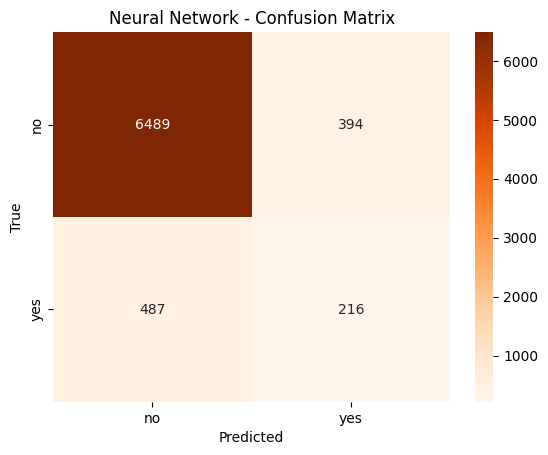

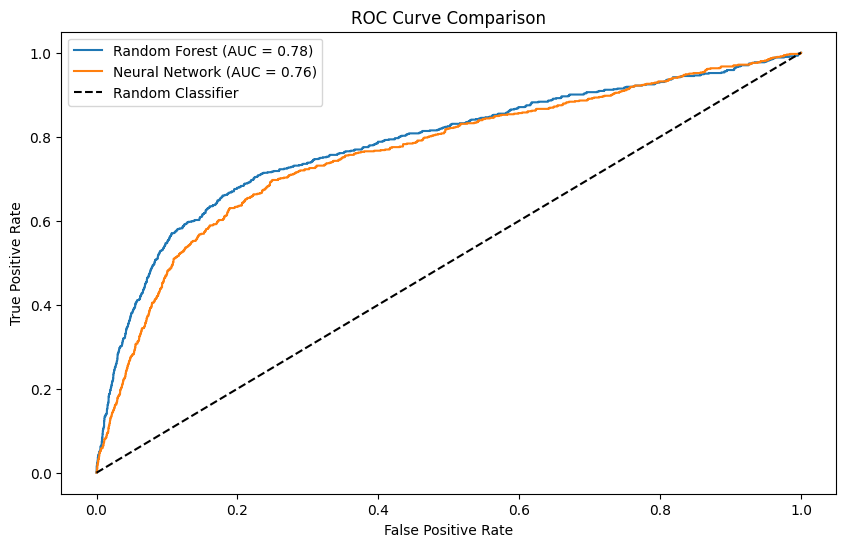

In [18]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Split the original dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data_cleaned, target_encoded, test_size=0.2, random_state=42
)

# Step 2: Apply SMOTE-Tomek to balance the training set only
smote_tomek = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train, y_train)

# Check class distribution after resampling
print(f"Class distribution in the resampled training target: {pd.Series(y_train_resampled).value_counts()}")

# ** RANDOM FOREST MODEL ** #
print("\nTraining Random Forest Model...")
rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42, class_weight='balanced')
rf_model.fit(X_train_resampled, y_train_resampled)

# Predictions and Evaluation
rf_pred = rf_model.predict(X_test)
rf_pred_prob = rf_model.predict_proba(X_test)[:, 1]

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred))

print("Random Forest ROC-AUC Score:", roc_auc_score(y_test, rf_pred_prob))

# Confusion Matrix
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ** NEURAL NETWORK MODEL ** #
print("\nTraining Neural Network Model...")
nn_model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_resampled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the Neural Network
nn_history = nn_model.fit(X_train_resampled, y_train_resampled, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=2)

# Predictions and Evaluation
nn_pred_prob = nn_model.predict(X_test).flatten()
nn_pred = (nn_pred_prob > 0.5).astype(int)

print("\nNeural Network Classification Report:")
print(classification_report(y_test, nn_pred))

print("Neural Network ROC-AUC Score:", roc_auc_score(y_test, nn_pred_prob))

# Plot Confusion Matrix for Neural Network
cm_nn = confusion_matrix(y_test, nn_pred)
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Oranges', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Neural Network - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ** ROC CURVES COMPARISON ** #
# Compute ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred_prob)
# Compute ROC Curve for Neural Network
fpr_nn, tpr_nn, _ = roc_curve(y_test, nn_pred_prob)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label="Random Forest (AUC = {:.2f})".format(roc_auc_score(y_test, rf_pred_prob)))
plt.plot(fpr_nn, tpr_nn, label="Neural Network (AUC = {:.2f})".format(roc_auc_score(y_test, nn_pred_prob)))
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


### 4.Train the model

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Class distribution in the resampled training target: 0    27749
1    27749
Name: count, dtype: int64

Training Random Forest Model...

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94      6920
           1       0.39      0.35      0.37       703

    accuracy                           0.89      7623
   macro avg       0.66      0.65      0.65      7623
weighted avg       0.88      0.89      0.89      7623

Random Forest ROC-AUC Score: 0.7631096909200042


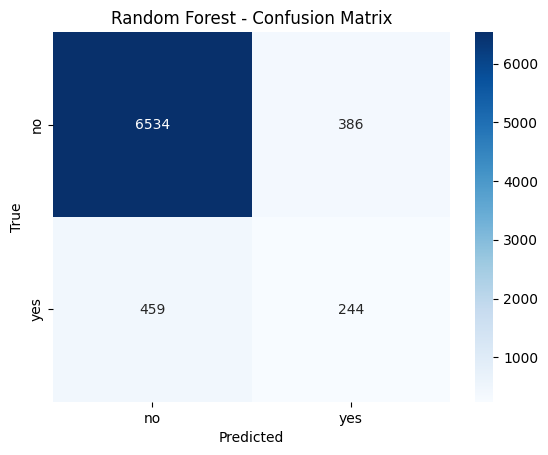


Training Neural Network Model...
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1735/1735 - 4s - 2ms/step - accuracy: 0.7982 - loss: 0.4407 - val_accuracy: 0.8171 - val_loss: 0.4435
Epoch 2/50
1735/1735 - 3s - 1ms/step - accuracy: 0.8294 - loss: 0.3804 - val_accuracy: 0.7957 - val_loss: 0.4615
Epoch 3/50
1735/1735 - 4s - 2ms/step - accuracy: 0.8442 - loss: 0.3513 - val_accuracy: 0.8221 - val_loss: 0.4270
Epoch 4/50
1735/1735 - 3s - 2ms/step - accuracy: 0.8520 - loss: 0.3322 - val_accuracy: 0.8405 - val_loss: 0.3892
Epoch 5/50
1735/1735 - 2s - 1ms/step - accuracy: 0.8587 - loss: 0.3204 - val_accuracy: 0.8528 - val_loss: 0.3852
Epoch 6/50
1735/1735 - 3s - 2ms/step - accuracy: 0.8634 - loss: 0.3100 - val_accuracy: 0.8259 - val_loss: 0.4269
Epoch 7/50
1735/1735 - 6s - 3ms/step - accuracy: 0.8665 - loss: 0.3022 - val_accuracy: 0.8341 - val_loss: 0.4082
Epoch 8/50
1735/1735 - 3s - 2ms/step - accuracy: 0.8688 - loss: 0.2938 - val_accuracy: 0.8588 - val_loss: 0.3718
Epoch 9/50
1735/1735 - 2s - 1ms/step - accuracy: 0.8724 - loss: 0.2883 - val_accuracy: 0.8486 - val_loss: 0

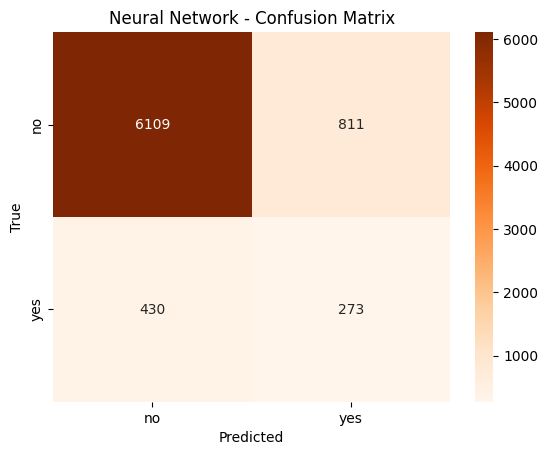

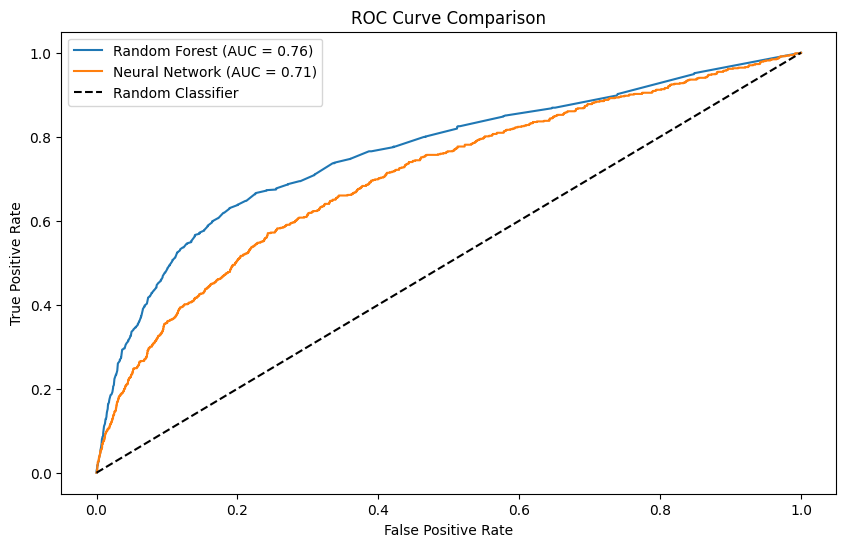

In [ ]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



# Step 1: Split the original dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data_cleaned, target_encoded, test_size=0.2, random_state=42
)

# Step 2: Apply SMOTE to balance the training set only
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after resampling
print(f"Class distribution in the resampled training target: {pd.Series(y_train_resampled).value_counts()}")

# ** RANDOM FOREST MODEL ** #
print("\nTraining Random Forest Model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)

# Predictions and Evaluation
rf_pred = rf_model.predict(X_test)
rf_pred_prob = rf_model.predict_proba(X_test)[:, 1]

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred))

print("Random Forest ROC-AUC Score:", roc_auc_score(y_test, rf_pred_prob))

# Confusion Matrix
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ** NEURAL NETWORK MODEL ** #
print("\nTraining Neural Network Model...")
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_resampled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the Neural Network
nn_history = nn_model.fit(X_train_resampled, y_train_resampled, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=2)

# Predictions and Evaluation
nn_pred_prob = nn_model.predict(X_test).flatten()
nn_pred = (nn_pred_prob > 0.5).astype(int)

print("\nNeural Network Classification Report:")
print(classification_report(y_test, nn_pred))

print("Neural Network ROC-AUC Score:", roc_auc_score(y_test, nn_pred_prob))

# Plot Confusion Matrix for Neural Network
cm_nn = confusion_matrix(y_test, nn_pred)
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Oranges', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Neural Network - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ** ROC CURVES COMPARISON ** #
# Compute ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred_prob)
# Compute ROC Curve for Neural Network
fpr_nn, tpr_nn, _ = roc_curve(y_test, nn_pred_prob)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label="Random Forest (AUC = {:.2f})".format(roc_auc_score(y_test, rf_pred_prob)))
plt.plot(fpr_nn, tpr_nn, label="Neural Network (AUC = {:.2f})".format(roc_auc_score(y_test, nn_pred_prob)))
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()
